<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CNN-BASICS/blob/master/LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gzip
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
# load train and test dataset

def load_dataset():
  # load dataset
	(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [0]:
X_train,y_train,X_test,y_test=load_dataset()

In [6]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000, 10)
Test: X=(10000, 28, 28), y=(10000, 10)


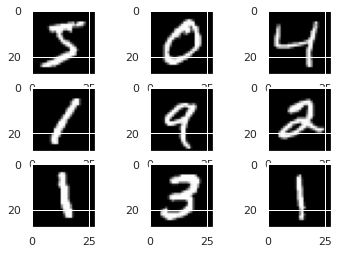

In [11]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# Sets up a timestamped log directory.
logdir = "logs/mnist/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Creates a file writer for the log directory.
file_writer = tf.summary.create_file_writer(logdir)

# Using the file writer, log the reshaped image.
with file_writer.as_default():
  tf.summary.image("Training data", np.reshape(X_train[0:50],(-1,28,28,1)), step=0)

In [0]:


model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [0]:
EPOCHS = 10
BATCH_SIZE = 128

In [0]:
X_train =X_train.reshape([-1, 28, 28, 1])
X_test =X_test.reshape([-1, 28, 28, 1])

In [0]:
X_validation = X_train[:5000]
y_validation = y_train[:5000]

In [0]:
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

In [40]:
# print('# of training images:', X_train['features'].shape[0])
# print('# of validation images:', X_validation['features'].shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/10
468/468 [==============================] - 16s 35ms/step - loss: 0.3991 - accuracy: 0.8829 - val_loss: 0.1279 - val_accuracy: 0.9681
Epoch 2/10
468/468 [==============================] - 16s 35ms/step - loss: 0.1006 - accuracy: 0.9701 - val_loss: 0.0659 - val_accuracy: 0.9770
Epoch 3/10
468/468 [==============================] - 16s 35ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0263 - val_accuracy: 0.9854
Epoch 4/10
468/468 [==============================] - 16s 35ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0580 - val_accuracy: 0.9858
Epoch 5/10
468/468 [==============================] - 17s 35ms/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0478 - val_accuracy: 0.9865
Epoch 6/10
468/468 [==============================] - 16s 35ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0089 - val_accuracy: 0.9912
Epoch 7/10
468/468 [==============================] - 16s 35ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0062 - val_accuracy:

In [42]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

LOG_DIR = 'logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

--2020-05-03 08:02:23--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.174.137.247, 3.214.203.143, 52.20.42.118, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.174.137.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  40.3MB/s    in 0.3s    

2020-05-03 08:02:23 (40.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [43]:
ngrok_url = !curl -s http://localhost:4040/api/tunnels | python -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
        
ngrok_url = ngrok_url[0].replace("'", '')
print(ngrok_url)

http://18fe5f83.ngrok.io
